In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import scipy
from scipy.stats import mannwhitneyu 
import matplotlib.colors as mcolors
import scipy.stats as stats
import pandas as pd
import math
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from mpl_toolkits import mplot3d

# C) Tent Map simulation for slight modification of parameter

In [2]:
def tent_map(x, r):
    """    Tent Map function.
    Args:
        x (float): The current value (0 <= x <= 1).
        r (float): The parameter (0 <= r <= 2).
    Returns:
        float: The next value of x after applying the Tent Map.
    """
    if x < 0.5:
        return r * x
    else:
        return r * (1 - x)
def gen_chaos_seq(x,r,imsize):
    seq=[]
    for i in range(imsize):
        seq.append(x)
        x=tent_map(x,r)    
    return seq

In [3]:
seq1=gen_chaos_seq(0.3,1.4,1000)
seq2=gen_chaos_seq(0.5,1.4,1000)
x=[i for i in range(1000)]

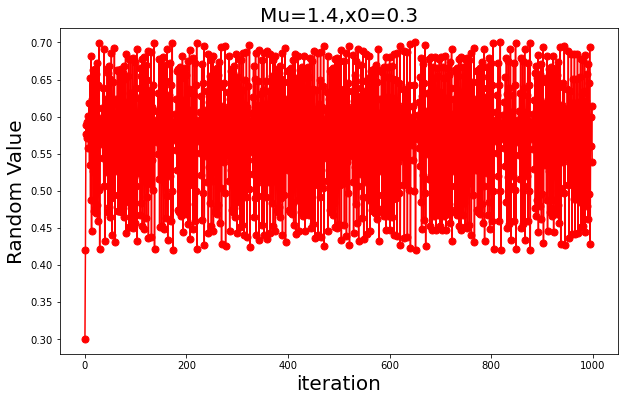

In [4]:
plt.figure(figsize=(10,6))
plt.plot(x,seq1,'r',marker='o',ms=7)
plt.xlabel("iteration",fontsize = 20)
plt.ylabel("Random Value",fontsize = 20)
plt.title("Mu=1.4,x0=0.3",fontsize = 20)

plt.show()

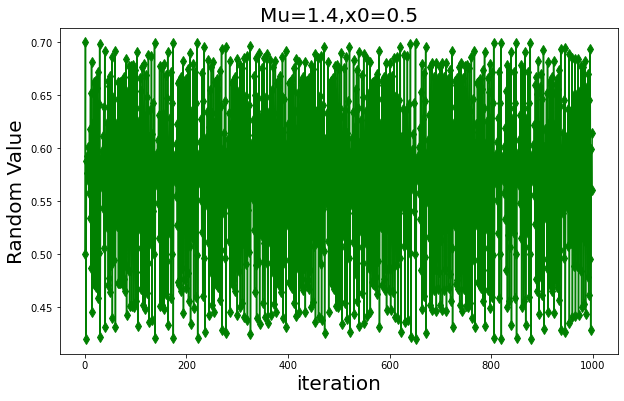

In [5]:
plt.figure(figsize=(10,6))
plt.plot(x,seq2,'g',marker='d',ms=7)
plt.xlabel("iteration",fontsize = 20)
plt.ylabel("Random Value",fontsize = 20)
plt.title("Mu=1.4,x0=0.5",fontsize = 20)
plt.show()

# A)GRAPHICAL DATA ANALYSIS FOR PAPER1

# For Airplane cover and girls as Secret

# a) UACI explanation for k=2 and k=4

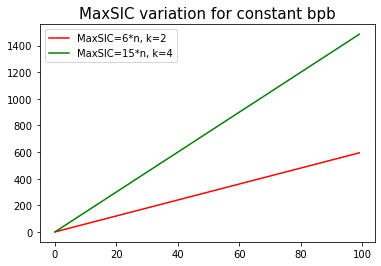

In [6]:
uacik2=[]
uacik4=[]
x=[i for i in range(100)]
for i in range(100):
    f1=6*i
    f2=15*i
    uacik2.append(f1)
    uacik4.append(f2)
plt.plot(x,uacik2,'red',label='MaxSIC=6*n, k=2')
plt.plot(x,uacik4,'green',label='MaxSIC=15*n, k=4')
plt.title('MaxSIC variation for constant bpb',fontsize = 15)
plt.legend()
plt.show()
    

# b)NPCR explanation.

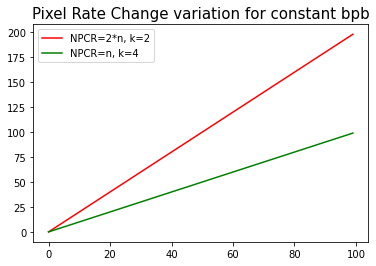

In [7]:
npcrk2=[]
npcrk4=[]
x=[i for i in range(100)]
for i in range(100):
    f1=2*i
    f2=i
    npcrk2.append(f1)
    npcrk4.append(f2)
plt.plot(x,npcrk2,'red',label='NPCR=2*n, k=2')
plt.plot(x,npcrk4,'green',label='NPCR=n, k=4')
plt.title('Pixel Rate Change variation for constant bpb',fontsize = 15)
plt.legend()
plt.show()

# 1)NPCR PSNR UACI analysis k=1 2 4 and 128x256=1 bpb

In [8]:
df_k1_1=pd.read_excel('./Paper1Aug2024Tent/stego1bit/airplane_k1_1_stego_128_256.xlsx')
df_k2_1=pd.read_excel('./Paper1Aug2024Tent/stego2bit/airplane_k2_1_stego_128_256.xlsx')
df_k4_1=pd.read_excel('./Paper1Aug2024Tent/stego4bit/airplane_k4_1_stego_128_256.xlsx')

In [9]:
print(df_k1_1)
print(df_k2_1)
print(df_k4_1)

   levels   MSE   PSNR   SSIM    NPCR   UACI  NCC  BER
0  Level0  0.50  51.13  0.996  50.113  0.197    1    0
1  Level1  1.11  47.69  0.991  62.955  0.306    1    0
2  Level2  1.67  45.90  0.987  69.263  0.385    1    0
3  Level3  2.18  44.75  0.985  72.992  0.444    1    0
4  Level4  2.75  43.73  0.984  76.082  0.504    1    0
5  Level5  3.25  43.01  0.984  77.719  0.549    1    0
6  Level6  3.84  42.29  0.984  79.803  0.601    1    0
   levels   MSE   PSNR   SSIM    NPCR   UACI  NCC  BER
0  Level0  1.20  47.33  0.989  37.582  0.241    1    0
1  Level1  1.95  45.23  0.983  40.148  0.305    1    0
2  Level2  2.73  43.78  0.980  57.911  0.426    1    0
3  Level3  3.50  42.69  0.977  69.013  0.523    1    0
4  Level4  4.19  41.91  0.976  75.035  0.593    1    0
5  Level5  5.28  40.90  0.975  78.752  0.678    1    0
6  Level6  6.42  40.06  0.975  81.076  0.752    1    0
   levels    MSE   PSNR   SSIM    NPCR   UACI    NCC      BER
0  Level0   9.85  38.20  0.929  23.429  0.501  1.000  0.00

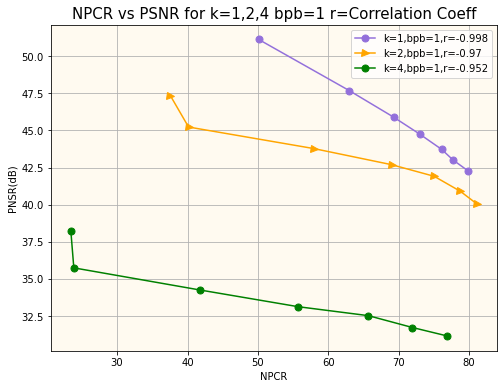

In [10]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.set_facecolor("floralwhite")
r1=np.corrcoef(df_k1_1.NPCR,df_k1_1.PSNR)
r2=np.corrcoef(df_k2_1.NPCR,df_k2_1.PSNR)
r4=np.corrcoef(df_k4_1.NPCR,df_k4_1.PSNR)
plt.plot(df_k1_1.NPCR,df_k1_1.PSNR,'mediumpurple',marker='o',ms=7,label="k=1,bpb=1,r="+str(round(r1[0,1],3)))
plt.plot(df_k2_1.NPCR,df_k2_1.PSNR,'orange',marker='>',ms=7,label="k=2,bpb=1,r="+str(round(r2[0,1],3)))
plt.plot(df_k4_1.NPCR,df_k4_1.PSNR,'green',marker='o',ms=7,label="k=4,bpb=1,r="+str(round(r4[0,1],3)))
plt.xlabel('NPCR')
plt.ylabel('PNSR(dB)')
plt.title('NPCR vs PSNR for k=1,2,4 bpb=1 r=Correlation Coeff',fontsize = 15)
plt.grid('True')
plt.legend()
plt.show()

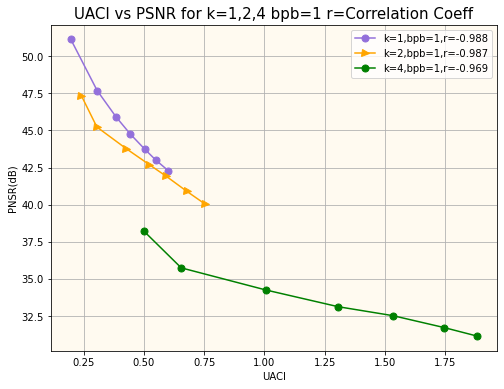

In [11]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.set_facecolor("floralwhite")
r1=np.corrcoef(df_k1_1.PSNR,df_k1_1.UACI)
r2=np.corrcoef(df_k2_1.PSNR,df_k2_1.UACI)
r4=np.corrcoef(df_k4_1.PSNR,df_k4_1.UACI)
plt.plot(df_k1_1.UACI,df_k1_1.PSNR,'mediumpurple',marker='o',ms=7,label="k=1,bpb=1,r="+str(round(r1[0,1],3)))
plt.plot(df_k2_1.UACI,df_k2_1.PSNR,'orange',marker='>',ms=7,label="k=2,bpb=1,r="+str(round(r2[0,1],3)))
plt.plot(df_k4_1.UACI,df_k4_1.PSNR,'green',marker='o',ms=7,label="k=4,bpb=1,r="+str(round(r4[0,1],3)))
plt.xlabel('UACI')
plt.ylabel('PNSR(dB)')
plt.title('UACI vs PSNR for k=1,2,4 bpb=1 r=Correlation Coeff',fontsize = 15)
plt.grid('True')
plt.legend()
plt.show()

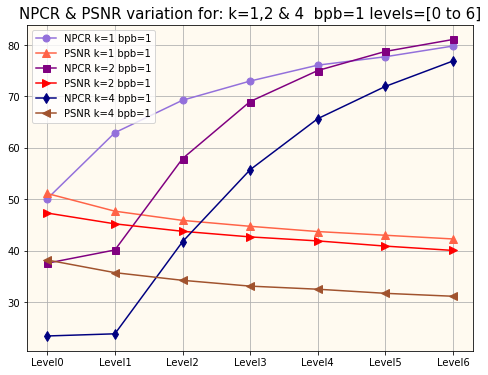

In [12]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.set_facecolor("floralwhite")
plt.plot(df_k1_1.levels,df_k1_1.NPCR,'mediumpurple',marker='o',ms=7,label='NPCR k=1 bpb=1')
plt.plot(df_k1_1.levels,df_k1_1.PSNR,'tomato',marker='^',ms=8,label='PSNR k=1 bpb=1')
plt.plot(df_k2_1.levels,df_k2_1.NPCR,'purple',marker='s',ms=7,label='NPCR k=2 bpb=1')
plt.plot(df_k2_1.levels,df_k2_1.PSNR,'red',marker='>',ms=8,label='PSNR k=2 bpb=1')
plt.plot(df_k4_1.levels,df_k4_1.NPCR,'navy',marker='d',ms=7,label='NPCR k=4 bpb=1')
plt.plot(df_k4_1.levels,df_k4_1.PSNR,'sienna',marker='<',ms=8,label='PSNR k=4 bpb=1')
#plt.xticks(df_k1_p5.levels, rotation ='vertical',fontfamily='Verdana')
plt.grid('True')
plt.title('NPCR & PSNR variation for: k=1,2 & 4  bpb=1 levels=[0 to 6]',fontsize = 15)
plt.legend()
plt.show()

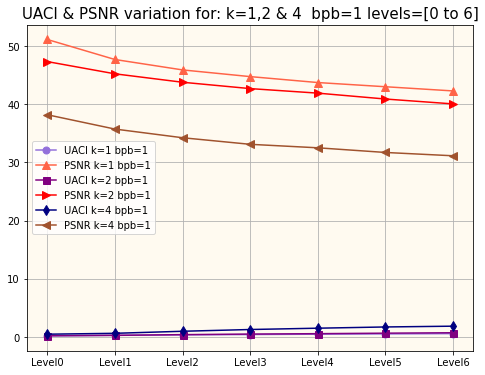

In [13]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.set_facecolor("floralwhite")
plt.plot(df_k1_1.levels,df_k1_1.UACI,'mediumpurple',marker='o',ms=7,label='UACI k=1 bpb=1')
plt.plot(df_k1_1.levels,df_k1_1.PSNR,'tomato',marker='^',ms=8,label='PSNR k=1 bpb=1')
plt.plot(df_k2_1.levels,df_k2_1.UACI,'purple',marker='s',ms=7,label='UACI k=2 bpb=1')
plt.plot(df_k2_1.levels,df_k2_1.PSNR,'red',marker='>',ms=8,label='PSNR k=2 bpb=1')
plt.plot(df_k4_1.levels,df_k4_1.UACI,'navy',marker='d',ms=7,label='UACI k=4 bpb=1')
plt.plot(df_k4_1.levels,df_k4_1.PSNR,'sienna',marker='<',ms=8,label='PSNR k=4 bpb=1')
#plt.xticks(df_k1_p5.levels, rotation ='vertical',fontfamily='Verdana')
plt.grid('True')
plt.title('UACI & PSNR variation for: k=1,2 & 4  bpb=1 levels=[0 to 6]',fontsize = 15)
plt.legend()
plt.show()

# 2) Airplane PSNR for k=1

In [14]:
df_pnsr_k1=pd.read_excel('../TablesCharts/AirplanePSNR_k1.xlsx')

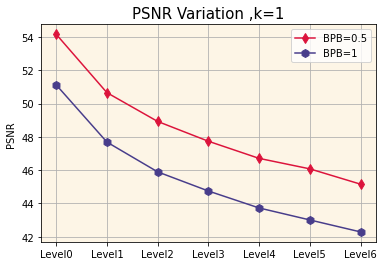

In [15]:
ax = plt.axes()
ax.set_facecolor("oldlace")
plt.plot(df_pnsr_k1.levels,df_pnsr_k1.bpbp5,'crimson',marker='d',ms=7,label='BPB=0.5')
plt.plot(df_pnsr_k1.levels,df_pnsr_k1.bpb1,'darkslateblue',marker='h',ms=8,label='BPB=1')
#plt.xticks(df_k1_p5.levels, rotation ='vertical',fontfamily='Verdana')
plt.grid('True')
plt.ylabel('PSNR ')
plt.title('PSNR Variation ,k=1',fontsize = 15)
plt.legend()
plt.show()

# 3) Airplane PSNR for k=2

In [16]:
df_pnsr_k2=pd.read_excel('../TablesCharts/AirplanePSNR_k2.xlsx')

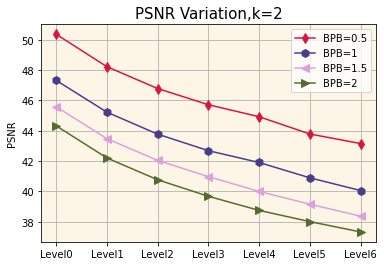

In [17]:
ax = plt.axes()
ax.set_facecolor("oldlace")
plt.plot(df_pnsr_k2.levels,df_pnsr_k2.bpbp5,'crimson',marker='d',ms=7,label='BPB=0.5')
plt.plot(df_pnsr_k2.levels,df_pnsr_k2.bpb1,'darkslateblue',marker='h',ms=8,label='BPB=1')
plt.plot(df_pnsr_k2.levels,df_pnsr_k2.bpb15,'plum',marker='<',ms=8,label='BPB=1.5')
plt.plot(df_pnsr_k2.levels,df_pnsr_k2.bpb2,'darkolivegreen',marker='>',ms=8,label='BPB=2')
#plt.xticks(df_pnsr_k2.levels, rotation ='vertical',fontfamily='Verdana')
plt.grid('True')
plt.ylabel('PSNR')
plt.title('PSNR Variation,k=2',fontsize = 15)
plt.legend()
plt.show()

# 4) Airplane PSNR for k=4

In [18]:
df_pnsr_k4=pd.read_excel('../TablesCharts/AirplanePSNR_k4.xlsx')

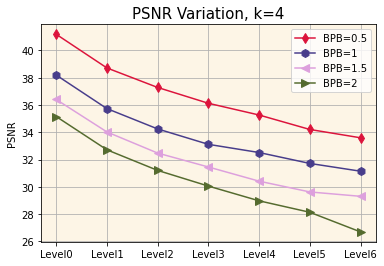

In [19]:
ax = plt.axes()
ax.set_facecolor("oldlace")
plt.plot(df_pnsr_k4.levels,df_pnsr_k4.bpbp5,'crimson',marker='d',ms=7,label='BPB=0.5')
plt.plot(df_pnsr_k4.levels,df_pnsr_k4.bpb1,'darkslateblue',marker='h',ms=8,label='BPB=1')
plt.plot(df_pnsr_k4.levels,df_pnsr_k4.bpb15,'plum',marker='<',ms=8,label='BPB=1.5')
plt.plot(df_pnsr_k4.levels,df_pnsr_k4.bpb2,'darkolivegreen',marker='>',ms=8,label='BPB=2')
#plt.xticks(df_pnsr_k4.levels, rotation ='vertical',fontfamily='Verdana')
plt.grid('True')
plt.ylabel('PSNR')
plt.title('PSNR Variation, k=4',fontsize = 15)
plt.legend()
plt.show()

# 5) Airplane MSE for k=2,4

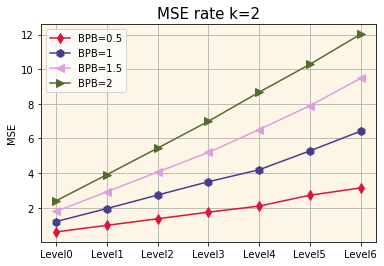

In [20]:
df_mse_k2=pd.read_excel('../TablesCharts/AirplaneMSE_k2.xlsx')
ax = plt.axes()
ax.set_facecolor("oldlace")
plt.plot(df_mse_k2.levels,df_mse_k2.bpbp5,'crimson',marker='d',ms=7,label='BPB=0.5')
plt.plot(df_mse_k2.levels,df_mse_k2.bpb1,'darkslateblue',marker='h',ms=8,label='BPB=1')
plt.plot(df_mse_k2.levels,df_mse_k2.bpb15,'plum',marker='<',ms=8,label='BPB=1.5')
plt.plot(df_mse_k2.levels,df_mse_k2.bpb2,'darkolivegreen',marker='>',ms=8,label='BPB=2')
#plt.xticks(df_mse_k2.levels, rotation ='vertical',fontfamily='Verdana')
plt.grid('True')
plt.ylabel('MSE')
plt.title('MSE rate k=2',fontsize = 15)
plt.legend()
plt.show()

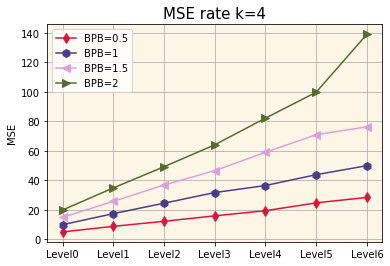

In [21]:
df_mse_k4=pd.read_excel('../TablesCharts/AirplaneMSE_k4.xlsx')
ax = plt.axes()
ax.set_facecolor("oldlace")
plt.plot(df_mse_k4.levels,df_mse_k4.bpbp5,'crimson',marker='d',ms=7,label='BPB=0.5')
plt.plot(df_mse_k4.levels,df_mse_k4.bpb1,'darkslateblue',marker='h',ms=8,label='BPB=1')
plt.plot(df_mse_k4.levels,df_mse_k4.bpb15,'plum',marker='<',ms=8,label='BPB=1.5')
plt.plot(df_mse_k4.levels,df_mse_k4.bpb2,'darkolivegreen',marker='>',ms=8,label='BPB=2')
#plt.xticks(df_mse_k2.levels, rotation ='vertical',fontfamily='Verdana')
plt.grid('True')
plt.ylabel('MSE')
plt.title('MSE rate k=4',fontsize = 15)
plt.legend()
plt.show()

# 5a) SSIM for k=2,4

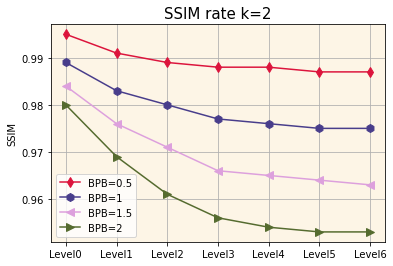

In [22]:
df_ssim_k2=pd.read_excel('../TablesCharts/AirplaneSSIM_k2.xlsx')
ax = plt.axes()
ax.set_facecolor("oldlace")
plt.plot(df_ssim_k2.levels,df_ssim_k2.bpbp5,'crimson',marker='d',ms=7,label='BPB=0.5')
plt.plot(df_ssim_k2.levels,df_ssim_k2.bpb1,'darkslateblue',marker='h',ms=8,label='BPB=1')
plt.plot(df_ssim_k2.levels,df_ssim_k2.bpb15,'plum',marker='<',ms=8,label='BPB=1.5')
plt.plot(df_ssim_k2.levels,df_ssim_k2.bpb2,'darkolivegreen',marker='>',ms=8,label='BPB=2')
#plt.xticks(df_mse_k2.levels, rotation ='vertical',fontfamily='Verdana')
plt.grid('True')
plt.ylabel('SSIM')
plt.title('SSIM rate k=2',fontsize = 15)
plt.legend()
plt.show()

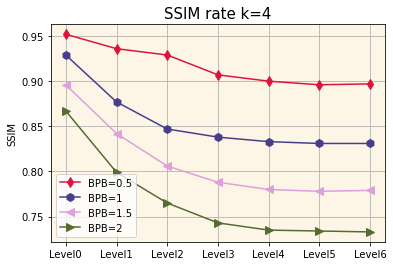

In [23]:
df_ssim_k4=pd.read_excel('../TablesCharts/AirplaneSSIM_k4.xlsx')
ax = plt.axes()
ax.set_facecolor("oldlace")
plt.plot(df_ssim_k4.levels,df_ssim_k4.bpbp5,'crimson',marker='d',ms=7,label='BPB=0.5')
plt.plot(df_ssim_k4.levels,df_ssim_k4.bpb1,'darkslateblue',marker='h',ms=8,label='BPB=1')
plt.plot(df_ssim_k4.levels,df_ssim_k4.bpb15,'plum',marker='<',ms=8,label='BPB=1.5')
plt.plot(df_ssim_k4.levels,df_ssim_k4.bpb2,'darkolivegreen',marker='>',ms=8,label='BPB=2')
#plt.xticks(df_mse_k2.levels, rotation ='vertical',fontfamily='Verdana')
plt.grid('True')
plt.ylabel('SSIM')
plt.title('SSIM rate k=4',fontsize = 15)
plt.legend()
plt.show()

# 6) Airplane NPCR for k=2

In [24]:
df_npcr_k2=pd.read_excel('../TablesCharts/AirplaneNPCR_k2.xlsx')

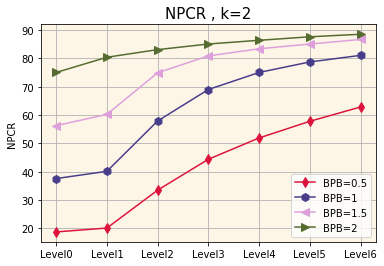

In [25]:
ax = plt.axes()
ax.set_facecolor("oldlace")
plt.plot(df_npcr_k2.levels,df_npcr_k2.bpbp5,'crimson',marker='d',ms=7,label='BPB=0.5')
plt.plot(df_npcr_k2.levels,df_npcr_k2.bpb1,'darkslateblue',marker='h',ms=8,label='BPB=1')
plt.plot(df_npcr_k2.levels,df_npcr_k2.bpb15,'plum',marker='<',ms=8,label='BPB=1.5')
plt.plot(df_npcr_k2.levels,df_npcr_k2.bpb2,'darkolivegreen',marker='>',ms=8,label='BPB=2')
#plt.xticks(df_mse_k2.levels, rotation ='vertical',fontfamily='Verdana')
plt.grid('True')
plt.ylabel('NPCR')
plt.title('NPCR , k=2',fontsize = 15)
plt.legend()
plt.show()

# 7) Airplane UACI for k=2

In [26]:
df_uaci_k2=pd.read_excel('../TablesCharts/AirplaneUACI_k2.xlsx')

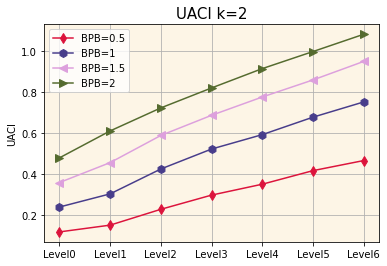

In [27]:
ax = plt.axes()
ax.set_facecolor("oldlace")
plt.plot(df_uaci_k2.levels,df_uaci_k2.bpbp5,'crimson',marker='d',ms=7,label='BPB=0.5')
plt.plot(df_uaci_k2.levels,df_uaci_k2.bpb1,'darkslateblue',marker='h',ms=8,label='BPB=1')
plt.plot(df_uaci_k2.levels,df_uaci_k2.bpb15,'plum',marker='<',ms=8,label='BPB=1.5')
plt.plot(df_uaci_k2.levels,df_uaci_k2.bpb2,'darkolivegreen',marker='>',ms=8,label='BPB=2')
#plt.xticks(df_mse_k2.levels, rotation ='vertical',fontfamily='Verdana')
plt.grid('True')
plt.ylabel('UACI')
plt.title('UACI k=2',fontsize = 15)
plt.legend()
plt.show()

# 8) Difference PNSR plot for k=2 and k=4

In [28]:
df_pnsr_k2=pd.read_excel('../TablesCharts/AirplanePSNR_k2.xlsx')
df_pnsr_k4=pd.read_excel('../TablesCharts/AirplanePSNR_k4.xlsx')
df_pnsr_k2=df_pnsr_k2.drop('levels',axis=1)
df_pnsr_k4=df_pnsr_k4.drop('levels',axis=1)

In [29]:
df_pnsr_k2.values

array([[50.37, 47.33, 45.59, 44.33],
       [48.23, 45.23, 43.48, 42.21],
       [46.79, 43.78, 42.05, 40.77],
       [45.72, 42.69, 40.98, 39.68],
       [44.93, 41.91, 40.  , 38.75],
       [43.79, 40.9 , 39.16, 38.01],
       [43.16, 40.06, 38.37, 37.33]])

In [30]:
df_pnsr_k4.values

array([[41.19, 38.2 , 36.41, 35.16],
       [38.72, 35.74, 34.03, 32.72],
       [37.29, 34.25, 32.48, 31.21],
       [36.13, 33.12, 31.46, 30.06],
       [35.27, 32.52, 30.42, 28.98],
       [34.21, 31.72, 29.63, 28.14],
       [33.6 , 31.15, 29.31, 26.7 ]])

In [31]:
level=[i for i in range(7)]
bpb=[0.5,1,1.5,2]
psnrk2=df_pnsr_k2.values
psnrk4=df_pnsr_k4.values
diff_psnr=psnrk2-psnrk4

In [32]:
print(diff_psnr)

[[ 9.18  9.13  9.18  9.17]
 [ 9.51  9.49  9.45  9.49]
 [ 9.5   9.53  9.57  9.56]
 [ 9.59  9.57  9.52  9.62]
 [ 9.66  9.39  9.58  9.77]
 [ 9.58  9.18  9.53  9.87]
 [ 9.56  8.91  9.06 10.63]]


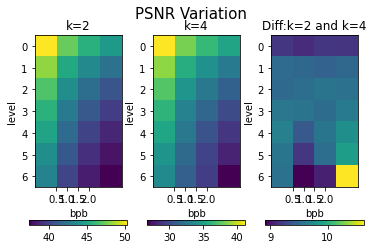

In [33]:
bpb=[0.5,1,1.5,2]
plt.subplot(1,3,1)
plt.imshow(psnrk2,cmap='viridis')
plt.colorbar(orientation="horizontal")
plt.xlabel('bpb')
plt.ylabel('level')
plt.xticks(bpb, rotation ='horizontal',fontfamily='Verdana')
plt.title('k=2')
plt.subplot(1,3,2)
plt.imshow(psnrk4,cmap='viridis')
plt.colorbar(orientation="horizontal")
plt.xlabel('bpb')
plt.ylabel('level')
plt.xticks(bpb, rotation ='horizontal',fontfamily='Verdana')
plt.title('k=4')
plt.subplot(1,3,3)
plt.imshow(diff_psnr,cmap='viridis')
plt.colorbar(orientation="horizontal")
plt.xlabel('bpb')
plt.ylabel('level')
plt.xticks(bpb, rotation ='horizontal',fontfamily='Verdana')
plt.title('Diff:k=2 and k=4')
plt.suptitle('PSNR Variation',fontsize = 15)
plt.show()

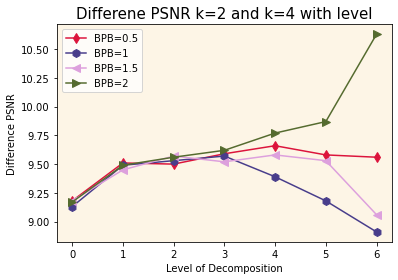

In [34]:
ax = plt.axes()
ax.set_facecolor("oldlace")
level=[i for i in range(7)]
plt.plot(level,diff_psnr[:,0],'crimson',marker='d',ms=7,label='BPB=0.5')
plt.plot(level,diff_psnr[:,1],'darkslateblue',marker='h',ms=8,label='BPB=1')
plt.plot(level,diff_psnr[:,2],'plum',marker='<',ms=8,label='BPB=1.5')
plt.plot(level,diff_psnr[:,3],'darkolivegreen',marker='>',ms=8,label='BPB=2')
#plt.xticks(level, rotation ='vertical',fontfamily='Verdana')
#plt.grid('True')
plt.ylabel('Difference PSNR')
plt.xlabel('Level of Decomposition')
plt.title('Differene PSNR k=2 and k=4 with level',fontsize = 15)
plt.legend()
plt.show()

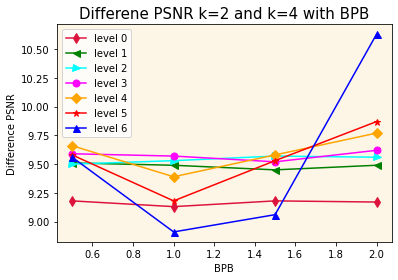

In [35]:
ax = plt.axes()
ax.set_facecolor("oldlace")
bpb=[0.5,1,1.5,2]
plt.plot(bpb,diff_psnr[0,:],'crimson',marker='d',ms=7,label='level 0')
plt.plot(bpb,diff_psnr[1,:],'green',marker='<',ms=7,label='level 1')
plt.plot(bpb,diff_psnr[2,:],'cyan',marker='>',ms=7,label='level 2')
plt.plot(bpb,diff_psnr[3,:],'magenta',marker='o',ms=7,label='level 3')
plt.plot(bpb,diff_psnr[4,:],'orange',marker='D',ms=7,label='level 4')
plt.plot(bpb,diff_psnr[5,:],'red',marker='*',ms=7,label='level 5')
plt.plot(bpb,diff_psnr[6,:],'blue',marker='^',ms=7,label='level 6')
#plt.xticks(level, rotation ='vertical',fontfamily='Verdana')
#plt.grid('True')
plt.ylabel('Difference PSNR')
plt.xlabel('BPB')
plt.title('Differene PSNR k=2 and k=4 with BPB',fontsize = 15)
plt.legend()
plt.show()

In [36]:
from mpl_toolkits import mplot3d

# 8a) 3D Surface plot of SIPI images

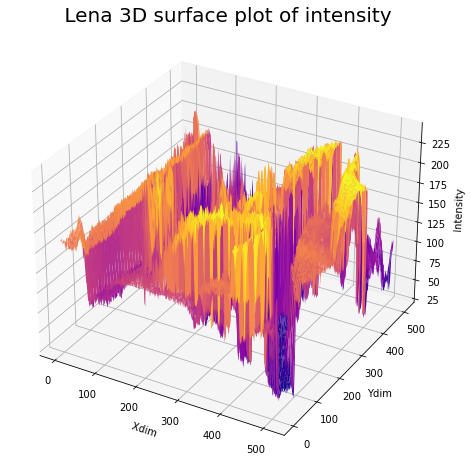

In [37]:
im=cv2.imread('./Paper1Aug2024Tent/Cover/lena.tiff',0)
fig = plt.figure(figsize=(20,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
gray=[i for i in range(512)]
x,y = np.meshgrid(gray,gray)
z=im
ax.set_xlabel(' Xdim')
ax.set_ylabel('Ydim')
ax.set_zlabel('Intensity')
ax.plot_surface(x,y,z,cmap='plasma',alpha=1)
ax.set_title(' Lena 3D surface plot of intensity',fontsize = 20)
plt.show()

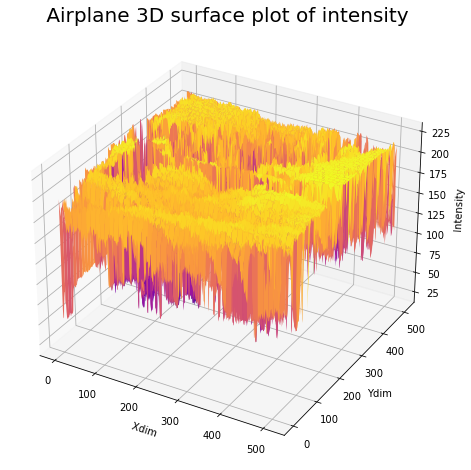

In [38]:
im=cv2.imread('./Paper1Aug2024Tent/Cover/airplane.tiff',0)
fig = plt.figure(figsize=(20,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
gray=[i for i in range(512)]
x,y = np.meshgrid(gray,gray)
z=im

ax.set_xlabel(' Xdim')
ax.set_ylabel('Ydim')
ax.set_zlabel('Intensity')
ax.plot_surface(x,y,z,cmap='plasma',alpha=1)
ax.set_title(' Airplane 3D surface plot of intensity',fontsize = 20)
plt.show()

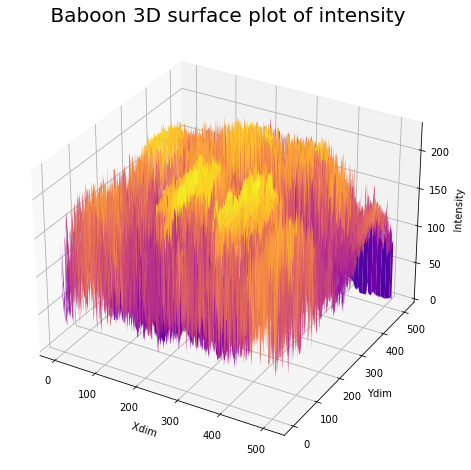

In [39]:
im=cv2.imread('./Paper1Aug2024Tent/Cover/baboon.tiff',0)
fig = plt.figure(figsize=(20,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
gray=[i for i in range(512)]
x,y = np.meshgrid(gray,gray)
z=im
ax.set_xlabel(' Xdim')
ax.set_ylabel('Ydim')
ax.set_zlabel('Intensity')
ax.plot_surface(x,y,z,cmap='plasma',alpha=1)
ax.set_title(' Baboon 3D surface plot of intensity',fontsize = 20)
plt.show()

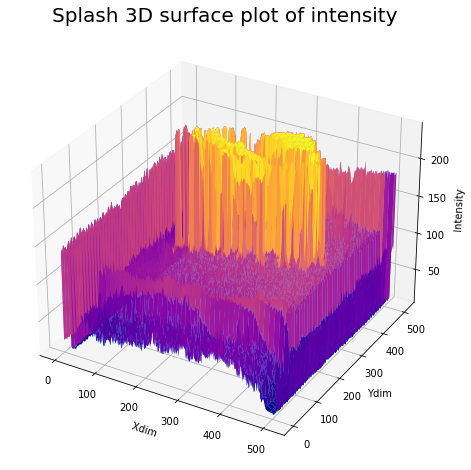

In [40]:
im=cv2.imread('./Paper1Aug2024Tent/Cover/splash.tiff',0)
fig = plt.figure(figsize=(20,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
gray=[i for i in range(512)]
x,y = np.meshgrid(gray,gray)
z=im
ax.plot_surface(x,y,z,cmap='cool',alpha=1)
ax.set_xlabel(' Xdim')
ax.set_ylabel('Ydim')
ax.set_zlabel('Intensity')
ax.plot_surface(x,y,z,cmap='plasma',alpha=1)
ax.set_title('Splash 3D surface plot of intensity',fontsize = 20)
plt.show()

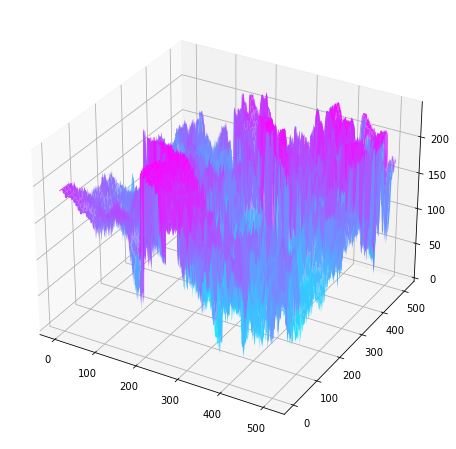

In [41]:
im=cv2.imread('./Paper1Aug2024Tent/Cover/elaine.tiff',0)
fig = plt.figure(figsize=(20,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
gray=[i for i in range(512)]
x,y = np.meshgrid(gray,gray)
z=im
ax.plot_surface(x,y,z,cmap='cool',alpha=1)
plt.show()

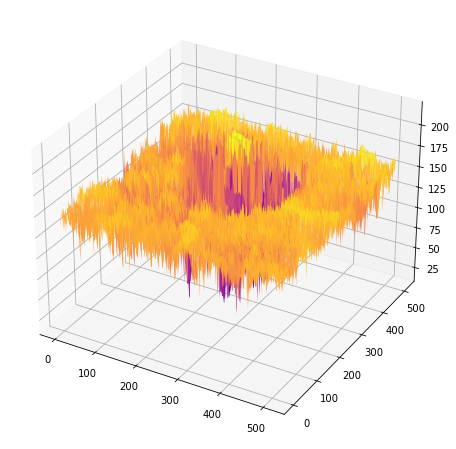

In [42]:
im=cv2.imread('./Paper1Aug2024Tent/Cover/tank.tiff',0)
fig = plt.figure(figsize=(20,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
gray=[i for i in range(512)]
x,y = np.meshgrid(gray,gray)
z=im
ax.plot_surface(x,y,z,cmap='plasma',alpha=1)
plt.show()

# 8b) Airplane Stego Image


# Cover

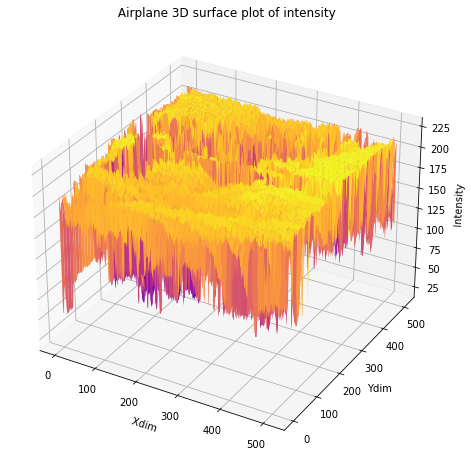

In [43]:
im=cv2.imread('./Paper1Aug2024Tent/Cover/airplane.tiff',0)
fig = plt.figure(figsize=(20,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
gray=[i for i in range(512)]
x,y = np.meshgrid(gray,gray)
z=im

ax.set_xlabel(' Xdim')
ax.set_ylabel('Ydim')
ax.set_zlabel('Intensity')
ax.plot_surface(x,y,z,cmap='plasma',alpha=1)
ax.set_title(' Airplane 3D surface plot of intensity')
plt.show()

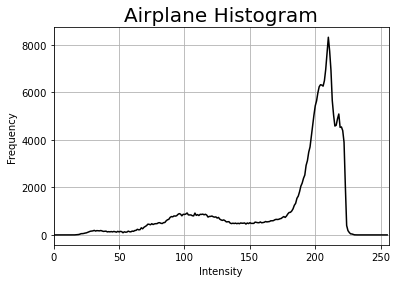

In [44]:
im=cv2.imread('./Paper1Aug2024Tent/Cover/airplane.tiff',0)
hist = cv2.calcHist([im], [0], None, [256], [0, 256])
plt.title('Airplane Histogram',fontsize = 20)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.grid(True)
plt.show()

# at k=4 bpb=2 level=7

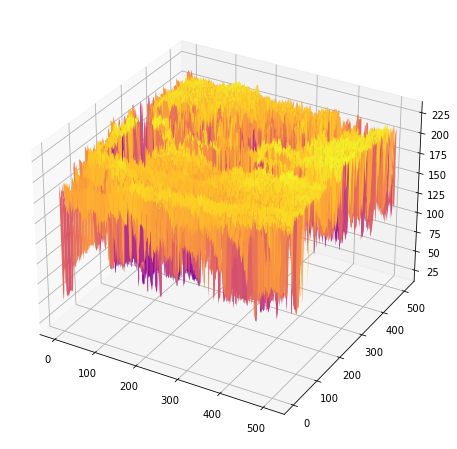

In [45]:
im=cv2.imread('./Paper1Aug2024Tent/stego2bit/images/airplane_k2_2_stego_7.png',0)
fig = plt.figure(figsize=(20,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
gray=[i for i in range(512)]
x,y = np.meshgrid(gray,gray)
z=im
ax.plot_surface(x,y,z,cmap='plasma',alpha=1)
plt.show()

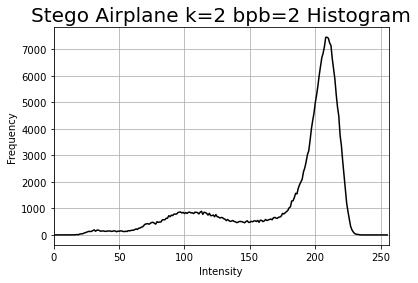

In [46]:
im=cv2.imread('./Paper1Aug2024Tent/stego2bit/images/airplane_k2_2_stego_7.png',0)
hist = cv2.calcHist([im], [0], None, [256], [0, 256])
plt.title('Stego Airplane k=2 bpb=2 Histogram',fontsize = 20)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.grid(True)
plt.show()

# at k=4 bpb=2 level=7

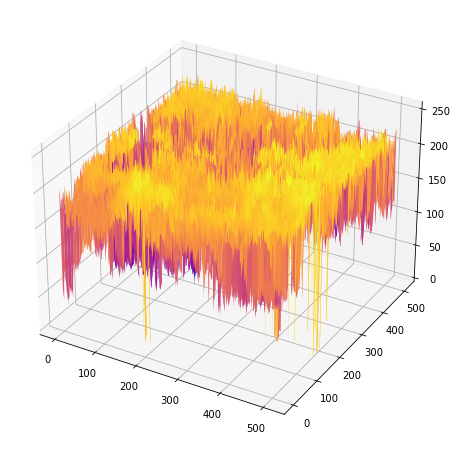

In [47]:
im=cv2.imread('./Paper1Aug2024Tent/stego4bit/images/airplane_k4_2_stego_7.png',0)
fig = plt.figure(figsize=(20,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
gray=[i for i in range(512)]
x,y = np.meshgrid(gray,gray)
z=im
ax.plot_surface(x,y,z,cmap='plasma',alpha=1)
plt.show()

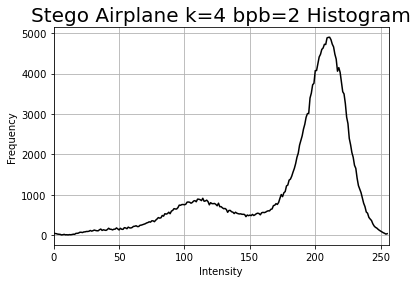

In [48]:
im=cv2.imread('./Paper1Aug2024Tent/stego4bit/images/airplane_k4_2_stego_7.png',0)
hist = cv2.calcHist([im], [0], None, [256], [0, 256])
plt.title('Stego Airplane k=4 bpb=2 Histogram',fontsize = 20)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.plot(hist, color='black')
plt.xlim([0, 256])
plt.grid(True)
plt.show()

# 9) 3D Surface plot to view PSNR changes for k=2 and k=4

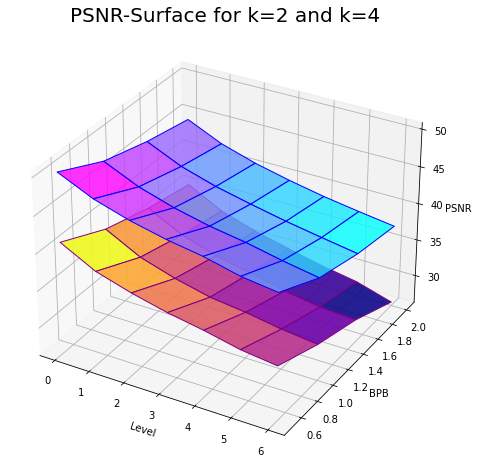

In [49]:
df_pnsr_k2=pd.read_excel('../TablesCharts/AirplanePSNR_k2.xlsx')
df_pnsr_k4=pd.read_excel('../TablesCharts/AirplanePSNR_k4.xlsx')
df_pnsr_k2=df_pnsr_k2.drop('levels',axis=1)
df_pnsr_k4=df_pnsr_k4.drop('levels',axis=1)
psnrk2=df_pnsr_k2.values
psnrk4=df_pnsr_k4.values
# defining surface and axes
level=[i for i in range(7)]
bpb=[0.5,1,1.5,2]
fig = plt.figure(figsize=(10,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
x,y = np.meshgrid(level, bpb)
z1=psnrk2.copy().T
z2=psnrk4.copy().T
#print(x)
#print(y)
#print(z)
# syntax for plotting
ax.plot_surface(x,y,z1,cmap='cool',edgecolor='blue',alpha=0.8)
ax.plot_surface(x,y,z2,cmap='plasma',edgecolor='purple',alpha=0.9)
ax.set_xlabel('Level')
ax.set_ylabel('BPB')
ax.set_zlabel('PSNR')
#ax.legend(['k=2','k=4'])
#legend(loc="upper right")
ax.set_title('PSNR-Surface for k=2 and k=4',fontsize = 20)
plt.show()

# 10) 3D Surface plot to view NPCR changes for k=2 and k=4

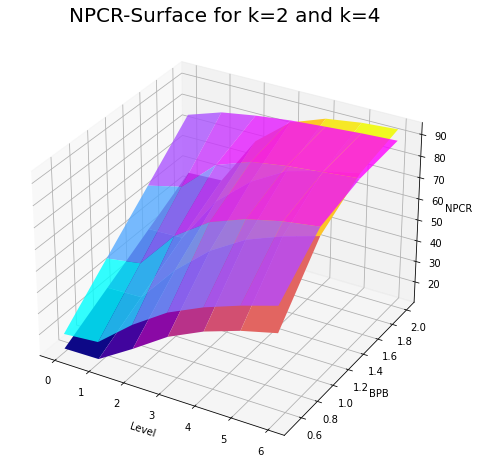

In [50]:
df_npcr_k2=pd.read_excel('../TablesCharts/AirplaneNPCR_k2.xlsx')
df_npcr_k4=pd.read_excel('../TablesCharts/AirplaneNPCR_k4.xlsx')
df_npcr_k2=df_npcr_k2.drop('levels',axis=1)
df_npcr_k4=df_npcr_k4.drop('levels',axis=1)
npcrk2=df_npcr_k2.values
npcrk4=df_npcr_k4.values
# defining surface and axes
level=[i for i in range(7)]
bpb=[0.5,1,1.5,2]
fig = plt.figure(figsize=(10,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
x,y = np.meshgrid(level, bpb)
z1=npcrk2.copy().T
z2=npcrk4.copy().T
# syntax for plotting
ax.plot_surface(x,y,z1,cmap='cool',alpha=0.8)
ax.plot_surface(x,y,z2,cmap='plasma')
ax.set_xlabel('Level')
ax.set_ylabel('BPB')
ax.set_zlabel('NPCR')
#ax.legend(['k=2','k=4'])
#legend(loc="upper right")
ax.set_title('NPCR-Surface for k=2 and k=4',fontsize = 20)
plt.show()

# 11) 3D Surface plot to view MSE changes for k=2 and k=4

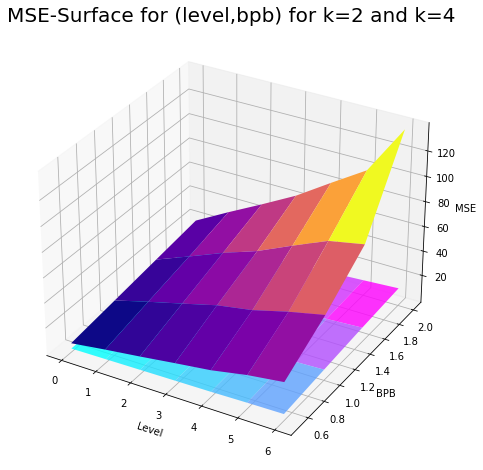

In [51]:
df_mse_k2=pd.read_excel('../TablesCharts/AirplaneMSE_k2.xlsx')
df_mse_k4=pd.read_excel('../TablesCharts/AirplaneMSE_k4.xlsx')
df_mse_k2=df_mse_k2.drop('levels',axis=1)
df_mse_k4=df_mse_k4.drop('levels',axis=1)
msek2=df_mse_k2.values
msek4=df_mse_k4.values
# defining surface and axes
level=[i for i in range(7)]
bpb=[0.5,1,1.5,2]
fig = plt.figure(figsize=(10,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
x,y = np.meshgrid(level, bpb)
z1=msek2.copy().T
z2=msek4.copy().T
# syntax for plotting
ax.plot_surface(x,y,z1,cmap='cool',alpha=0.8)
ax.plot_surface(x,y,z2,cmap='plasma')
ax.set_xlabel('Level')
ax.set_ylabel('BPB')
ax.set_zlabel('MSE')
#ax.legend(['k=2','k=4'])
#legend(loc="upper right")
ax.set_title('MSE-Surface for (level,bpb) for k=2 and k=4',fontsize = 20)
plt.show()

# 12) 3D Surface plot to view SSIM changes for k=2 and k=4

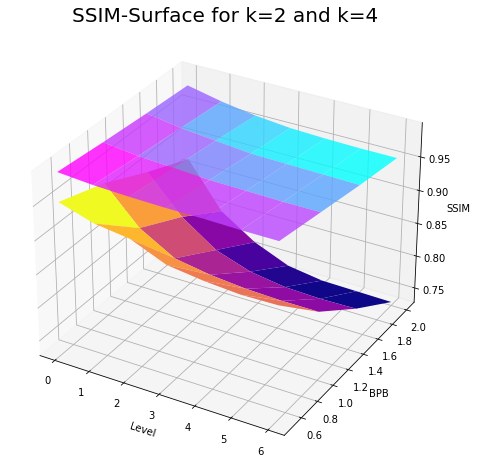

In [52]:
df_ssim_k2=pd.read_excel('../TablesCharts/AirplaneSSIM_k2.xlsx')
df_ssim_k4=pd.read_excel('../TablesCharts/AirplaneSSIM_k4.xlsx')
df_ssim_k2=df_ssim_k2.drop('levels',axis=1)
df_ssim_k4=df_ssim_k4.drop('levels',axis=1)
ssimk2=df_ssim_k2.values
ssimk4=df_ssim_k4.values
# defining surface and axes
level=[i for i in range(7)]
bpb=[0.5,1,1.5,2]
fig = plt.figure(figsize=(10,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
x,y = np.meshgrid(level, bpb)
z1=ssimk2.copy().T
z2=ssimk4.copy().T
# syntax for plotting
ax.plot_surface(x,y,z1,cmap='cool',alpha=0.8)
ax.plot_surface(x,y,z2,cmap='plasma')
ax.set_xlabel('Level')
ax.set_ylabel('BPB')
ax.set_zlabel('SSIM')
#ax.legend(['k=2','k=4'])
#legend(loc="upper right")
ax.set_title('SSIM-Surface for k=2 and k=4',fontsize = 20)
plt.show()

# 13) 3D Surface plot to view UACI changes for k=2 and k=4

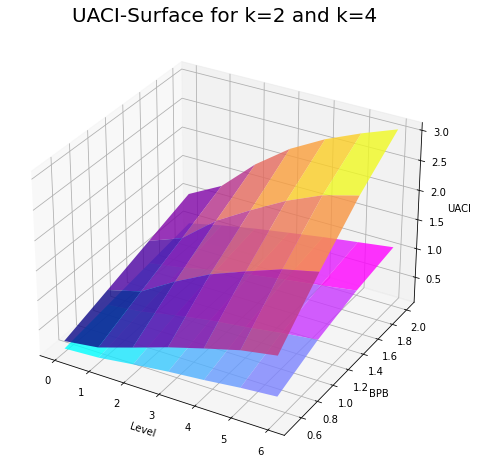

In [53]:
df_uaci_k2=pd.read_excel('../TablesCharts/AirplaneUACI_k2.xlsx')
df_uaci_k4=pd.read_excel('../TablesCharts/AirplaneUACI_k4.xlsx')
df_uaci_k2=df_uaci_k2.drop('levels',axis=1)
df_uaci_k4=df_uaci_k4.drop('levels',axis=1)
uacik2=df_uaci_k2.values
uacik4=df_uaci_k4.values
# defining surface and axes
level=[i for i in range(7)]
bpb=[0.5,1,1.5,2]
fig = plt.figure(figsize=(10,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
x,y = np.meshgrid(level, bpb)
z1=uacik2.copy().T
z2=uacik4.copy().T
# syntax for plotting
ax.plot_surface(x,y,z1,cmap='cool',alpha=0.8)
ax.plot_surface(x,y,z2,cmap='plasma',alpha=0.8)
ax.set_xlabel('Level')
ax.set_ylabel('BPB')
ax.set_zlabel('UACI')
#ax.legend(['k=2','k=4'])
#legend(loc="upper right")
ax.set_title('UACI-Surface for k=2 and k=4',fontsize = 20)
plt.show()

# 14) 3D Surface plot to view NCC changes for k=2 and k=4

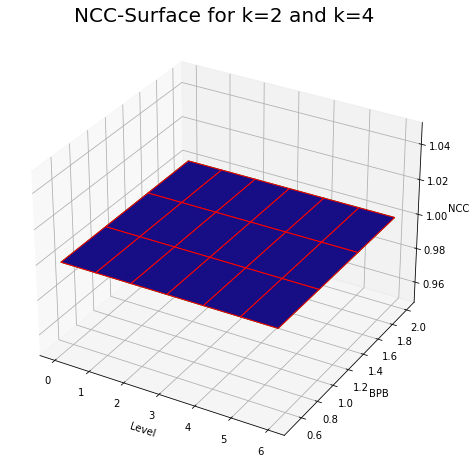

In [54]:
df_ncc_k2=pd.read_excel('../TablesCharts/AirplaneNCC_k2.xlsx')
df_ncc_k4=pd.read_excel('../TablesCharts/AirplaneNCC_k4.xlsx')
df_ncc_k2=df_ncc_k2.drop('levels',axis=1)
df_ncc_k4=df_ncc_k4.drop('levels',axis=1)
ncck2=df_ncc_k2.values
ncck4=df_ncc_k2.values
# defining surface and axes
level=[i for i in range(7)]
bpb=[0.5,1,1.5,2]
fig = plt.figure(figsize=(10,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
x,y = np.meshgrid(level, bpb)
z1=ncck2.copy().T
z2=ncck4.copy().T
# syntax for plotting
ax.plot_surface(x,y,z1,cmap='viridis',edgecolor='green',alpha=0.7)
ax.plot_surface(x,y,z2,cmap='plasma',edgecolor='red',alpha=0.9)
ax.set_xlabel('Level')
ax.set_ylabel('BPB')
ax.set_zlabel('NCC')
#ax.legend(['k=2','k=4'])
#legend(loc="upper right")
ax.set_title('NCC-Surface for k=2 and k=4',fontsize = 20)
plt.show()

# B) Abalation Test

[[50.37 47.33 45.59 44.33]
 [48.23 45.23 43.48 42.21]
 [46.79 43.78 42.05 40.77]
 [45.72 42.69 40.98 39.68]
 [44.93 41.91 40.   38.75]
 [43.79 40.9  39.16 38.01]
 [43.16 40.06 38.37 37.33]]
[[50.39 47.31 45.57 44.33]
 [48.25 45.25 43.49 42.23]
 [46.87 43.88 42.07 40.83]
 [45.51 42.5  40.86 39.57]
 [44.6  41.69 39.93 38.55]
 [43.4  40.59 39.18 37.67]
 [42.32 39.41 38.35 37.12]]


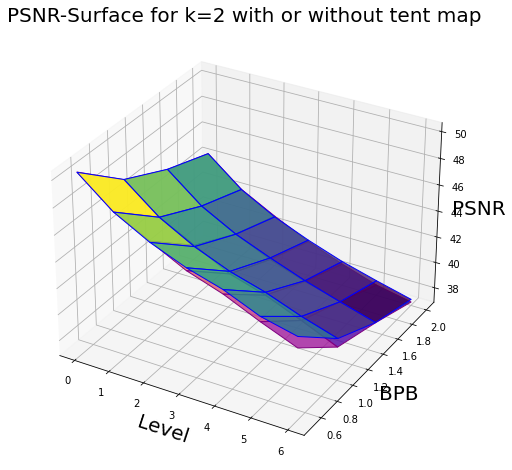

In [55]:
df_pnsr_k2_tent=pd.read_excel('../TablesCharts/AirplanePSNR_k2.xlsx')
df_pnsr_k2=pd.read_excel('../../Paper1 Multilevel High Capacity DWT/TablesCharts/AirplanePSNR_k2.xlsx')
df_pnsr_k2_tent=df_pnsr_k2_tent.drop('levels',axis=1)
df_pnsr_k2=df_pnsr_k2.drop('levels',axis=1)
psnrk2_tent=df_pnsr_k2_tent.values
psnrk2=df_pnsr_k2.values
print(psnrk2_tent)
print(psnrk2)
# defining surface and axes
level=[i for i in range(7)]
bpb=[0.5,1,1.5,2]
fig = plt.figure(figsize=(10,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
x,y = np.meshgrid(level, bpb)
z1=psnrk2_tent.copy().T
z2=psnrk2.copy().T
#print(x)
#print(y)
#print(z)
# syntax for plotting
ax.plot_surface(x,y,z1,cmap='viridis',edgecolor='blue',alpha=0.8)
ax.plot_surface(x,y,z2,cmap='plasma',edgecolor='purple',alpha=0.8)
ax.set_xlabel('Level',fontsize=20)
ax.set_ylabel('BPB',fontsize=20)
ax.set_zlabel('PSNR',fontsize=20)
#ax.legend(['k=2','k=4'])
#legend(loc="upper right")
ax.set_title('PSNR-Surface for k=2 with or without tent map',fontsize = 20)
plt.show()

[[41.19 38.2  36.41 35.16]
 [38.72 35.74 34.03 32.72]
 [37.29 34.25 32.48 31.21]
 [36.13 33.12 31.46 30.06]
 [35.27 32.52 30.42 28.98]
 [34.21 31.72 29.63 28.14]
 [33.6  31.15 29.31 26.7 ]]
[[41.17 38.26 36.44 35.13]
 [38.49 35.62 33.8  32.55]
 [37.24 34.03 32.39 31.12]
 [35.87 32.77 31.23 29.89]
 [34.56 31.43 29.96 28.76]
 [33.56 30.09 28.99 27.35]
 [32.9  29.32 28.13 26.25]]


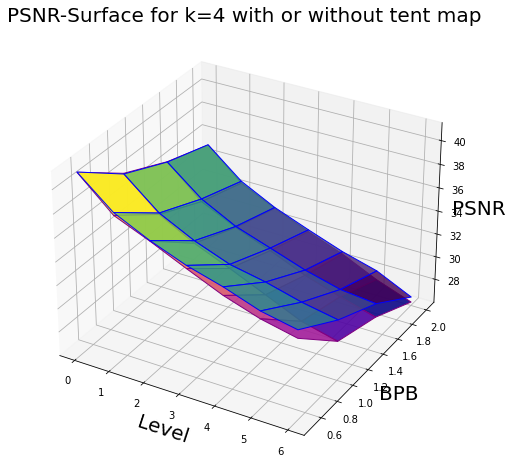

In [56]:
df_pnsr_k4_tent=pd.read_excel('../TablesCharts/AirplanePSNR_k4.xlsx')
df_pnsr_k4=pd.read_excel('../../Paper1 Multilevel High Capacity DWT/TablesCharts/AirplanePSNR_k4.xlsx')
df_pnsr_k4_tent=df_pnsr_k4_tent.drop('levels',axis=1)
df_pnsr_k4=df_pnsr_k4.drop('levels',axis=1)
psnrk4_tent=df_pnsr_k4_tent.values
psnrk4=df_pnsr_k4.values
print(psnrk4_tent)
print(psnrk4)
# defining surface and axes
level=[i for i in range(7)]
bpb=[0.5,1,1.5,2]
fig = plt.figure(figsize=(10,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
x,y = np.meshgrid(level, bpb)
z1=psnrk4_tent.copy().T
z2=psnrk4.copy().T
#print(x)
#print(y)
#print(z)
# syntax for plotting
ax.plot_surface(x,y,z1,cmap='viridis',edgecolor='blue',alpha=0.8)
ax.plot_surface(x,y,z2,cmap='plasma',edgecolor='purple',alpha=0.9)
ax.set_xlabel('Level',fontsize=20)
ax.set_ylabel('BPB',fontsize=20)
ax.set_zlabel('PSNR',fontsize=20)
#ax.legend(['k=2','k=4'])
#legend(loc="upper right")
ax.set_title('PSNR-Surface for k=4 with or without tent map',fontsize = 20)
plt.show()

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]
[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


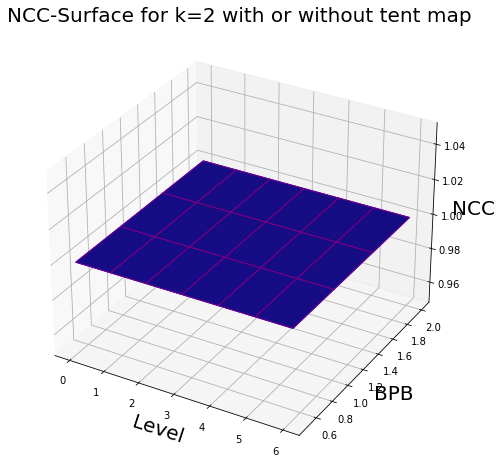

In [57]:
df_ncc_k2_tent=pd.read_excel('../TablesCharts/AirplaneNCC_k2.xlsx')
df_ncc_k2=pd.read_excel('../../Paper1 Multilevel High Capacity DWT/TablesCharts/AirplaneNCC_k2.xlsx')
df_ncc_k2_tent=df_ncc_k2_tent.drop('levels',axis=1)
df_ncc_k2=df_ncc_k2.drop('levels',axis=1)
ncck2_tent=df_ncc_k2_tent.values
ncck2=df_ncc_k2.values
print(ncck2_tent)
print(ncck2)
# defining surface and axes
level=[i for i in range(7)]
bpb=[0.5,1,1.5,2]
fig = plt.figure(figsize=(10,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
x,y = np.meshgrid(level, bpb)
z1=ncck2_tent.copy().T
z2=ncck2.copy().T
#print(x)
#print(y)
#print(z)
# syntax for plotting
ax.plot_surface(x,y,z1,cmap='viridis',edgecolor='blue',alpha=0.8)
ax.plot_surface(x,y,z2,cmap='plasma',edgecolor='purple',alpha=0.9)
ax.set_xlabel('Level',fontsize=20)
ax.set_ylabel('BPB',fontsize=20)
ax.set_zlabel('NCC',fontsize=20)
#ax.legend(['k=2','k=4'])
#legend(loc="upper right")
ax.set_title('NCC-Surface for k=2 with or without tent map',fontsize = 20)
plt.show()

[[1.         1.         1.         1.        ]
 [1.         1.         1.         1.        ]
 [1.         1.         0.99900001 1.        ]
 [1.         0.99900001 1.         0.99900001]
 [1.         1.         0.99800003 0.99699998]
 [1.         1.         0.99900001 0.99900001]
 [0.99900001 1.         1.         0.99199998]]
[[1.    1.    1.    1.   ]
 [1.    1.    1.    1.   ]
 [1.    1.    1.    1.   ]
 [1.    1.    1.    0.999]
 [1.    0.999 0.997 0.996]
 [1.    0.997 0.997 0.989]
 [1.    0.997 0.994 0.987]]


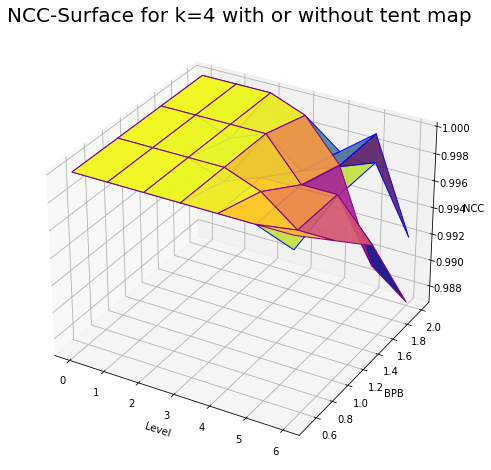

In [58]:
df_ncc_k4_tent=pd.read_excel('../TablesCharts/AirplaneNCC_k4.xlsx')
df_ncc_k4=pd.read_excel('../../Paper1 Multilevel High Capacity DWT/TablesCharts/AirplaneNCC_k4.xlsx')
df_ncc_k4_tent=df_ncc_k4_tent.drop('levels',axis=1)
df_ncc_k4=df_ncc_k4.drop('levels',axis=1)
ncck4_tent=df_ncc_k4_tent.values
ncck4=df_ncc_k4.values
print(ncck4_tent)
print(ncck4)
# defining surface and axes
level=[i for i in range(7)]
bpb=[0.5,1,1.5,2]
fig = plt.figure(figsize=(10,8))
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
x,y = np.meshgrid(level, bpb)
z1=ncck4_tent.copy().T
z2=ncck4.copy().T
#print(x)
#print(y)
#print(z)
# syntax for plotting
ax.plot_surface(x,y,z1,cmap='viridis',edgecolor='blue',alpha=0.8)
ax.plot_surface(x,y,z2,cmap='plasma',edgecolor='purple',alpha=0.9)
ax.set_xlabel('Level')
ax.set_ylabel('BPB')
ax.set_zlabel('NCC')
#ax.legend(['k=2','k=4'])
#legend(loc="upper right")
ax.set_title('NCC-Surface for k=4 with or without tent map',fontsize = 20)
plt.show()

In [59]:
df_stegexpose=pd.read_excel('../TablesCharts/AbalationStegexpose.xlsx')

In [60]:
df_stegexpose

,File name,RS tent,RS no Tent,Byte Tent,Byte no tent,Chi tent,Chi no tent,SP tent,SP no tent
0,airplane_k1_bpb1_stego_0.png,0.042947,0.040247,1983,1802,0.005686,0.005065,0.050207,0.048627
1,airplane_k1_bpb1_stego_1.png,0.008555,0.010445,235,611,0.005121,0.004787,0.003807,0.012246
2,airplane_k1_bpb1_stego_2.png,0.009667,0.021329,240,975,0.005079,0.003988,0.003103,0.028911
3,airplane_k1_bpb1_stego_3.png,0.006680,0.018876,324,1071,0.005102,0.005450,0.008556,0.028165
4,airplane_k1_bpb1_stego_4.png,0.007903,0.012280,201,508,0.004807,0.005961,0.001682,0.013056
5,airplane_k1_bpb1_stego_5.png,0.009103,0.013456,273,606,0.003802,0.006232,0.000128,0.011658
6,airplane_k1_bpb1_stego_6.png,0.002623,0.008936,217,481,0.005587,0.004807,0.007202,0.016267
7,airplane_k2_bpb2_stego_0.png,0.402903,0.404104,18824,18043,0.004186,0.002554,0.465816,0.455581
8,airplane_k2_bpb2_stego_1.png,0.036372,0.039124,1714,2488,0.003383,0.005240,0.049024,0.071519
9,airplane_k2_bpb2_stego_2.png,0.007186,0.023073,534,932,0.005607,0.004891,0.020369,0.025724


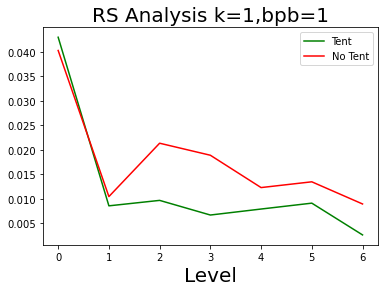

In [61]:
plt.plot([i for i in range(7)],df_stegexpose['RS tent'][0:7],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['RS no Tent'][0:7],color='r',label="No Tent")
plt.title('RS Analysis k=1,bpb=1',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

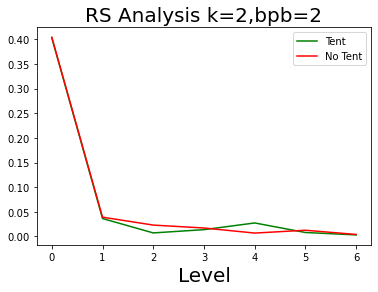

In [62]:
plt.plot([i for i in range(7)],df_stegexpose['RS tent'][7:14],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['RS no Tent'][7:14],color='r',label="No Tent")
plt.title('RS Analysis k=2,bpb=2',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

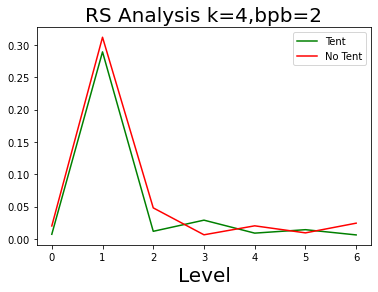

In [63]:
plt.plot([i for i in range(7)],df_stegexpose['RS tent'][14:21],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['RS no Tent'][14:21],color='r',label="No Tent")
plt.title('RS Analysis k=4,bpb=2',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

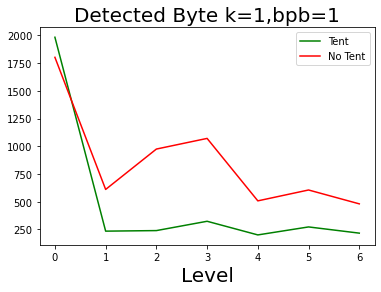

In [64]:
plt.plot([i for i in range(7)],df_stegexpose['Byte Tent'][0:7],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['Byte no tent'][0:7],color='r',label="No Tent")
plt.title('Detected Byte k=1,bpb=1',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

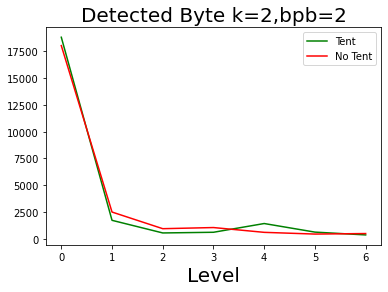

In [65]:
plt.plot([i for i in range(7)],df_stegexpose['Byte Tent'][7:14],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['Byte no tent'][7:14],color='r',label="No Tent")
plt.title('Detected Byte k=2,bpb=2',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

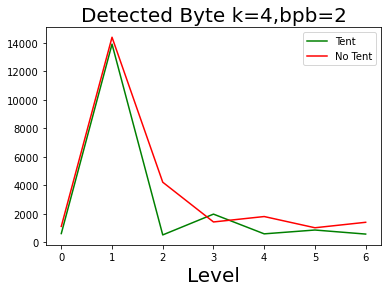

In [66]:
plt.plot([i for i in range(7)],df_stegexpose['Byte Tent'][14:21],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['Byte no tent'][14:21],color='r',label="No Tent")
plt.title('Detected Byte k=4,bpb=2',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

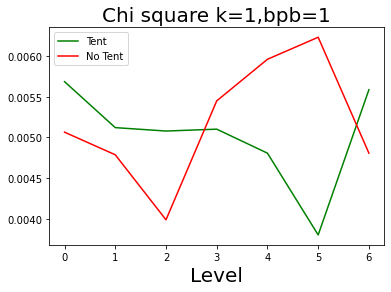

In [67]:
plt.plot([i for i in range(7)],df_stegexpose['Chi tent'][0:7],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['Chi no tent'][0:7],color='r',label="No Tent")
plt.title('Chi square k=1,bpb=1',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

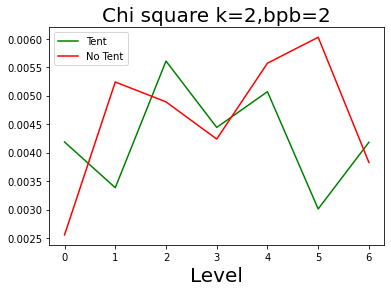

In [68]:
plt.plot([i for i in range(7)],df_stegexpose['Chi tent'][7:14],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['Chi no tent'][7:14],color='r',label="No Tent")
plt.title('Chi square k=2,bpb=2',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

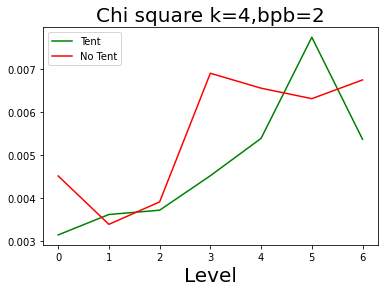

In [69]:
plt.plot([i for i in range(7)],df_stegexpose['Chi tent'][14:21],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['Chi no tent'][14:21],color='r',label="No Tent")
plt.title('Chi square k=4,bpb=2',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

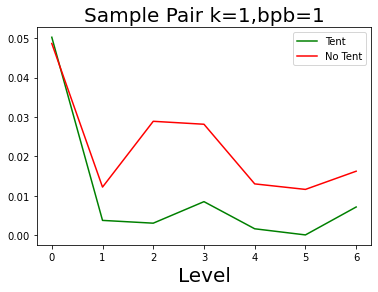

In [70]:
plt.plot([i for i in range(7)],df_stegexpose['SP tent'][0:7],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['SP no tent'][0:7],color='r',label="No Tent")
plt.title('Sample Pair k=1,bpb=1',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

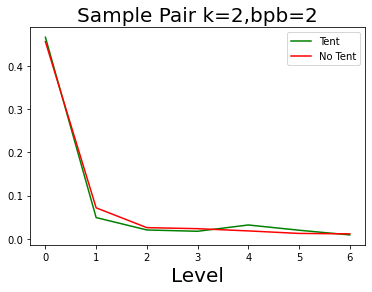

In [71]:
plt.plot([i for i in range(7)],df_stegexpose['SP tent'][7:14],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['SP no tent'][7:14],color='r',label="No Tent")
plt.title('Sample Pair k=2,bpb=2',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

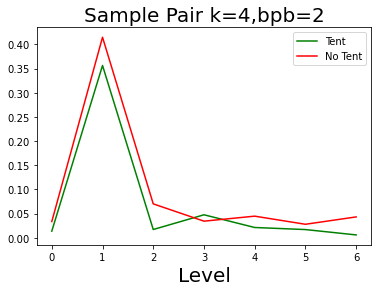

In [72]:
plt.plot([i for i in range(7)],df_stegexpose['SP tent'][14:21],color='g',label="Tent")
plt.plot([i for i in range(7)],df_stegexpose['SP no tent'][14:21],color='r',label="No Tent")
plt.title('Sample Pair k=4,bpb=2',fontsize=20)
plt.xlabel('Level',fontsize=20)
plt.legend()
plt.show()

# C)STATISTICAL DATA ANALYSIS FOR PAPER1

# 1) Test of PSNR data for k=2

In [73]:
df_psnr_k2=pd.read_excel('../TablesCharts/AirplanePSNR_k2.xlsx')
df_psnr_k2=df_psnr_k2.drop('levels',axis=1)
df_psnr_k2

,bpbp5,bpb1,bpb15,bpb2
0,50.37,47.33,45.59,44.33
1,48.23,45.23,43.48,42.21
2,46.79,43.78,42.05,40.77
3,45.72,42.69,40.98,39.68
4,44.93,41.91,40.00,38.75
5,43.79,40.90,39.16,38.01
6,43.16,40.06,38.37,37.33


In [74]:
levels=[i for i in range(7)]
bpb=[0.5,1,1.5,2]

# i) Mann Whitney U test for consequtive column pairs k=2

In [75]:
cols=4
pvalues=[]
decision=[]
alpha = 0.05
for i in range(cols-1):
        stat, p_value = mannwhitneyu(df_psnr_k2.values[:,i],df_psnr_k2.values[:,i+1],alternative='two-sided') 
        pvalues.append(round(p_value,3))
        if p_value < alpha:
            decision.append(False)
        else:
            decision.append(True)

In [76]:
print(pvalues)
print(bpb)
print(decision)

[0.053, 0.259, 0.383]
[0.5, 1, 1.5, 2]
[True, True, True]


# ii) Paired t test for consequtive column pairs k=2

# Normality tests

In [77]:
for i in range(4):
    shapiro_test = stats.shapiro(df_psnr_k2.values[:,i])
    print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.9609910249710083, p-value=0.827190637588501
Shapiro-Wilk Test: W=0.9670734405517578, p-value=0.8766084313392639
Shapiro-Wilk Test: W=0.9622097611427307, p-value=0.8374545574188232
Shapiro-Wilk Test: W=0.9518490433692932, p-value=0.7464967966079712


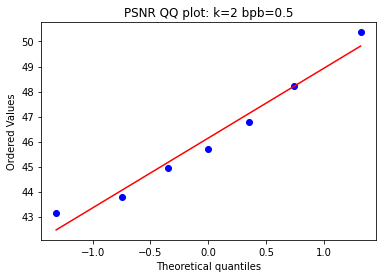

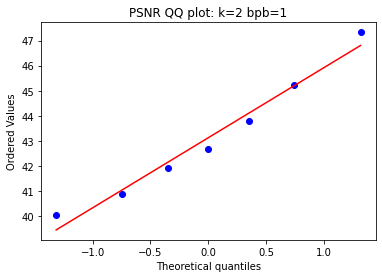

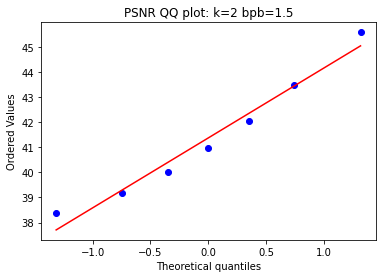

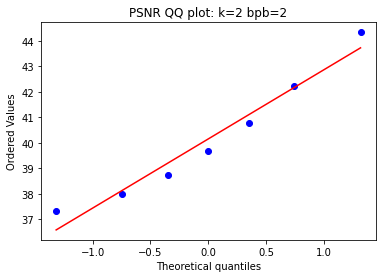

In [78]:
bpb=[0.5,1,1.5,2]
for i in range(4):
    stats.probplot(df_psnr_k2.values[:,i], dist="norm", plot=plt)
    plt.title('PSNR QQ plot: k=2 bpb='+str(bpb[i]))
    plt.show()
    

In [79]:
for i in range(4):
    v = np.var(df_psnr_k2.values[:,i])
    print("variance for ",bpb[i],"is=",round(v,3))

variance for  0.5 is= 5.532
variance for  1 is= 5.507
variance for  1.5 is= 5.519
variance for  2 is= 5.259


In [80]:
cols=4
pvalues=[]
decision=[]
alpha = 0.05
for i in range(cols-1):
        stat, p_value = ttest_rel(df_psnr_k2.values[:,i],df_psnr_k2.values[:,i+1],alternative='two-sided') 
        pvalues.append(round(p_value,3))
        if p_value < alpha:
            decision.append(False)
        else:
            decision.append(True)

In [81]:
print(pvalues)
print(bpb)
print(decision)

[0.0, 0.0, 0.0]
[0.5, 1, 1.5, 2]
[False, False, False]


# iii) Unpaired t test

In [82]:
cols=4
pvalues=[]
decision=[]
alpha = 0.05
for i in range(cols-1):
        stat, p_value = ttest_ind(df_psnr_k2.values[:,i],df_psnr_k2.values[:,i+1],alternative='two-sided') 
        pvalues.append(round(p_value,3))
        if p_value < alpha:
            decision.append(False)
        else:
            decision.append(True)

In [83]:
print(pvalues)
print(bpb)
print(decision)

[0.046, 0.22, 0.38]
[0.5, 1, 1.5, 2]
[False, True, True]


# iv) Anova test for k=2

# One Way

In [84]:
df_psnr_k2=pd.read_excel('../TablesCharts/AirplanePSNR_k2.xlsx')
df_psnr_k2=df_psnr_k2.drop('levels',axis=1)
df_psnr_k2

,bpbp5,bpb1,bpb15,bpb2
0,50.37,47.33,45.59,44.33
1,48.23,45.23,43.48,42.21
2,46.79,43.78,42.05,40.77
3,45.72,42.69,40.98,39.68
4,44.93,41.91,40.00,38.75
5,43.79,40.90,39.16,38.01
6,43.16,40.06,38.37,37.33


In [85]:
bp5=df_psnr_k2['bpbp5']
b1=df_psnr_k2['bpb1']
b15=df_psnr_k2['bpb15']
b2=df_psnr_k2['bpb2']

In [86]:
from scipy.stats import f_oneway

In [87]:
f_oneway(bp5,b1,b15,b2)

F_onewayResult(statistic=7.429174982097036, pvalue=0.0010978416309127296)

In [88]:
df_psnr_k4=pd.read_excel('../TablesCharts/AirplanePSNR_k4.xlsx')
df_psnr_k4=df_psnr_k4.drop('levels',axis=1)
df_psnr_k4

,bpbp5,bpb1,bpb15,bpb2
0,41.19,38.20,36.41,35.16
1,38.72,35.74,34.03,32.72
2,37.29,34.25,32.48,31.21
3,36.13,33.12,31.46,30.06
4,35.27,32.52,30.42,28.98
5,34.21,31.72,29.63,28.14
6,33.60,31.15,29.31,26.70


In [89]:
bp5=df_psnr_k4['bpbp5']
b1=df_psnr_k4['bpb1']
b15=df_psnr_k4['bpb15']
b2=df_psnr_k4['bpb2']

In [90]:
f_oneway(bp5,b1,b15,b2)

F_onewayResult(statistic=7.1019933280573015, pvalue=0.0014055842077786882)

# 2) Test of PSNR data for k=4

In [91]:
df_psnr_k4=pd.read_excel('../TablesCharts/AirplanePSNR_k4.xlsx')
df_psnr_k4=df_psnr_k4.drop('levels',axis=1)
df_psnr_k4

,bpbp5,bpb1,bpb15,bpb2
0,41.19,38.20,36.41,35.16
1,38.72,35.74,34.03,32.72
2,37.29,34.25,32.48,31.21
3,36.13,33.12,31.46,30.06
4,35.27,32.52,30.42,28.98
5,34.21,31.72,29.63,28.14
6,33.60,31.15,29.31,26.70


In [92]:
levels=[i for i in range(7)]
bpb=[0.5,1,1.5,2]

# i) Mann Whitney U test for consequtive column pairs k=4

In [93]:
cols=4
pvalues=[]
decision=[]
alpha = 0.05
for i in range(cols-1):
        stat, p_value = mannwhitneyu(df_psnr_k4.values[:,i],df_psnr_k4.values[:,i+1],alternative='two-sided') 
        pvalues.append(round(p_value,3))
        if p_value < alpha:
            decision.append(False)
        else:
            decision.append(True)

In [94]:
print(pvalues)
print(bpb)
print(decision)

[0.073, 0.165, 0.318]
[0.5, 1, 1.5, 2]
[True, True, True]


# ii) Paired t test for consequtive column pairs k=4

In [95]:
for i in range(4):
    shapiro_test = stats.shapiro(df_psnr_k4.values[:,i])
    print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.9528242349624634, p-value=0.7553179860115051
Shapiro-Wilk Test: W=0.9322604537010193, p-value=0.5702844262123108
Shapiro-Wilk Test: W=0.927681028842926, p-value=0.5313538908958435
Shapiro-Wilk Test: W=0.9801598787307739, p-value=0.9603099226951599


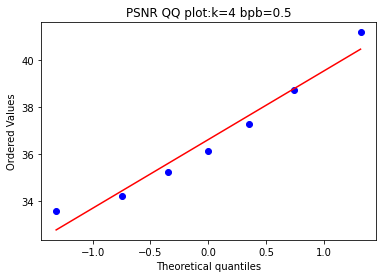

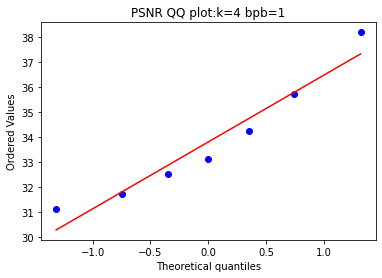

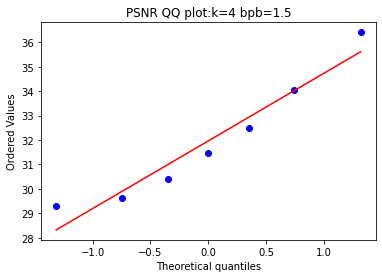

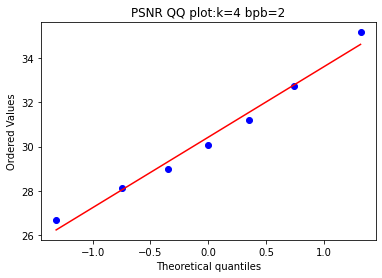

In [96]:
bpb=[0.5,1,1.5,2]
for i in range(4):
    stats.probplot(df_psnr_k4.values[:,i], dist="norm", plot=plt)
    plt.title('PSNR QQ plot:k=4 bpb='+str(bpb[i]))
    plt.show()

In [97]:
for i in range(4):
    v = np.var(df_psnr_k4.values[:,i])
    print("variance for ",bpb[i],"is=",round(v,3))

variance for  0.5 is= 6.105
variance for  1 is= 5.253
variance for  1.5 is= 5.633
variance for  2 is= 7.089


In [98]:
cols=4
pvalues=[]
decision=[]
alpha = 0.05
for i in range(cols-1):
        stat, p_value = ttest_rel(df_psnr_k4.values[:,i],df_psnr_k4.values[:,i+1],alternative='two-sided') 
        pvalues.append(round(p_value,3))
        if p_value < alpha:
            decision.append(False)
        else:
            decision.append(True)

In [99]:
print(pvalues)
print(bpb)
print(decision)

[0.0, 0.0, 0.0]
[0.5, 1, 1.5, 2]
[False, False, False]


# iii) Unpaired t test

In [100]:
cols=4
pvalues=[]
decision=[]
alpha = 0.05
for i in range(cols-1):
        stat, p_value = ttest_ind(df_psnr_k4.values[:,i],df_psnr_k4.values[:,i+1],alternative='two-sided') 
        pvalues.append(round(p_value,3))
        if p_value < alpha:
            decision.append(False)
        else:
            decision.append(True)

In [101]:
print(pvalues)
print(bpb)
print(decision)

[0.063, 0.194, 0.311]
[0.5, 1, 1.5, 2]
[True, True, True]


# 3)  a) 3-way Anova PSNR for k=2 and k=4

In [102]:
df_anova_psnr=pd.read_excel('../TablesCharts/Anova_3way_PSNR.xlsx')
df_anova_psnr

,k,level,bpb,psnr
0,2,0,0.5,50.37
1,2,1,0.5,48.23
2,2,2,0.5,46.79
3,2,3,0.5,45.72
4,2,4,0.5,44.93
5,2,5,0.5,43.79
6,2,6,0.5,43.16
7,2,0,1.0,47.33
8,2,1,1.0,45.23
9,2,2,1.0,43.78


In [103]:
print(list(df_anova_psnr['k'].values))
print(list(df_anova_psnr['level'].values))
print(list(df_anova_psnr['bpb'].values))
print(list(df_anova_psnr['psnr'].values))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[50.37, 48.23, 46.79, 45.72, 44.93, 43.79, 43.16, 47.33, 45.23, 43.78, 42.69, 41.91, 40.9, 40.06, 45.59, 43.48, 42.05, 40.98, 40.0, 39.16, 38.37, 44.33, 42.21, 40.77, 39.68, 38.75, 38.01, 37.33, 41.19, 38.72, 37.29, 36.13, 35.27, 34.21, 33.6, 38.2, 35.74, 34.25, 33.12, 32.52, 31.72, 31.15, 36.41, 34.03, 32.48, 31.46, 30.42, 29.63, 29.31, 35.16, 32.72, 31.21, 30.06, 28.98, 28.14,

In [104]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Sample data
data = {
    'k': list(df_anova_psnr['k'].values),
    'level': list(df_anova_psnr['level'].values),
    'bpb': list(df_anova_psnr['bpb'].values),
    'psnr': list(df_anova_psnr['psnr'].values)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Fit the two-way ANOVA model
model = ols('psnr ~ C(k)+C(level)+C(bpb)+C(k):C(bpb)+C(k):C(level)+C(bpb):C(level)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                      sum_sq    df             F        PR(>F)
C(k)             1261.410864   1.0  30665.798858  1.526371e-30
C(level)          319.813686   6.0   1295.816512  1.024982e-22
C(bpb)            291.138236   3.0   2359.259469  1.531033e-23
C(k):C(bpb)         0.332036   3.0      2.690675  7.703239e-02
C(k):C(level)       0.264886   6.0      1.073260  4.142201e-01
C(bpb):C(level)     0.470014  18.0      0.634799  8.281172e-01
Residual            0.740414  18.0           NaN           NaN


# Interaction plot

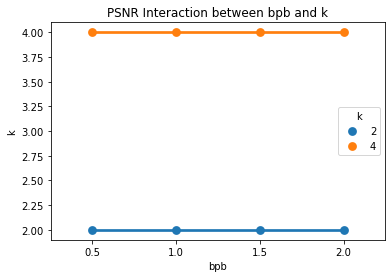

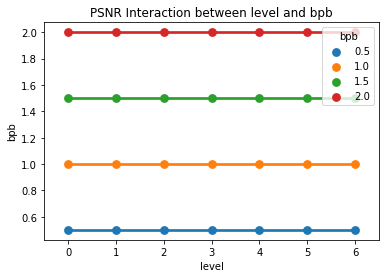

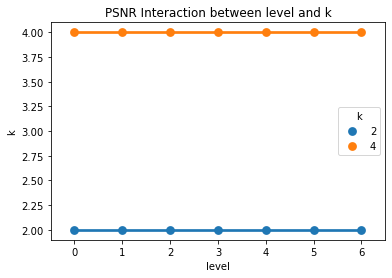

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pointplot(x=df['bpb'], y=df['k'], hue=df['k'], data=df)
plt.title("PSNR Interaction between bpb and k")
plt.show()
sns.pointplot(x=df['level'], y=df['bpb'], hue=df['bpb'], data=df)
plt.title("PSNR Interaction between level and bpb")
plt.show()
sns.pointplot(x=df['level'], y=df['k'], hue=df['k'], data=df)
plt.title("PSNR Interaction between level and k")
plt.show()


In [106]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['psnr'], groups=df['k'], alpha=0.05)
print(tukey)
tukey = pairwise_tukeyhsd(endog=df['psnr'], groups=df['bpb'], alpha=0.05)
print(tukey)
tukey = pairwise_tukeyhsd(endog=df['psnr'], groups=df['level'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     2      4  -9.4921  -0.0 -11.2971 -7.6872   True
----------------------------------------------------
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   0.5    1.0  -2.9143 0.5066  -8.4492  2.6206  False
   0.5    1.5  -4.7164 0.1205 -10.2513  0.8185  False
   0.5    2.0  -6.0964 0.0255 -11.6313 -0.5615   True
   1.0    1.5  -1.8021 0.8232  -7.3371  3.7328  False
   1.0    2.0  -3.1821 0.4297  -8.7171  2.3528  False
   1.5    2.0    -1.38 0.9109  -6.9149  4.1549  False
-----------------------------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -2.2775  0.983 -10.93

# b) 3-way Anova NCC for k=2 and k=4

In [107]:
df_anova_ncc=pd.read_excel('../TablesCharts/Anova_3way_NCC.xlsx')
df_anova_ncc

,k,level,bpb,ncc
0,2,0,0.5,1.000
1,2,1,0.5,1.000
2,2,2,0.5,1.000
3,2,3,0.5,1.000
4,2,4,0.5,1.000
5,2,5,0.5,1.000
6,2,6,0.5,1.000
7,2,0,1.0,1.000
8,2,1,1.0,1.000
9,2,2,1.0,1.000


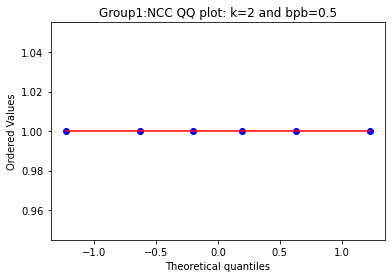

In [108]:
stats.probplot(df_anova_ncc.values[0:6:,3], dist="norm", plot=plt)
plt.title('Group1:NCC QQ plot: k=2 and bpb=0.5')
plt.show()    

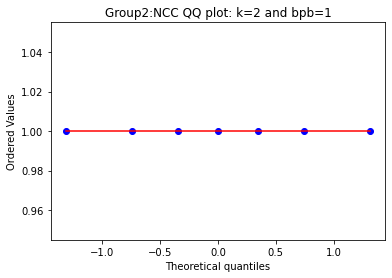

In [109]:
stats.probplot(df_anova_ncc.values[7:14:,3], dist="norm", plot=plt)
plt.title('Group2:NCC QQ plot: k=2 and bpb=1')
plt.show()

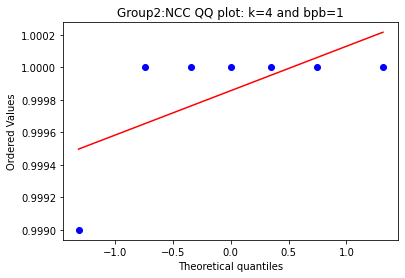

In [110]:
stats.probplot(df_anova_ncc.values[36:43:,3], dist="norm", plot=plt)
plt.title('Group2:NCC QQ plot: k=4 and bpb=1')
plt.show()

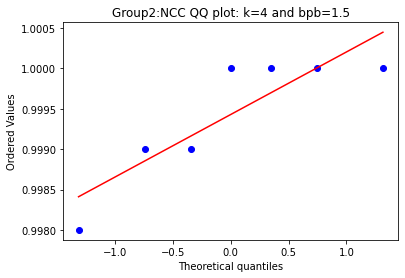

In [111]:
stats.probplot(df_anova_ncc.values[44:51,3], dist="norm", plot=plt)
plt.title('Group2:NCC QQ plot: k=4 and bpb=1.5')
plt.show()

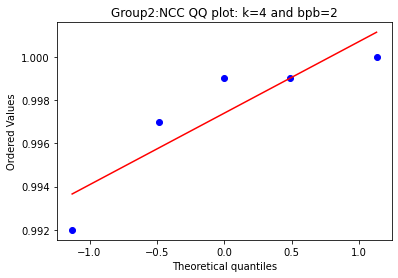

In [112]:
stats.probplot(df_anova_ncc.values[51:58,3], dist="norm", plot=plt)
plt.title('Group2:NCC QQ plot: k=4 and bpb=2')
plt.show()

In [116]:
shapiro_test = stats.shapiro(df_anova_ncc.values[36:43,3])
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.4529709219932556, p-value=4.135582003073068e-06


In [119]:
shapiro_test = stats.shapiro(df_anova_ncc.values[51:58,3])
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.8164581656455994, p-value=0.10961208492517471


In [117]:
shapiro_test = stats.shapiro(df_anova_ncc.values[:,3])
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

Shapiro-Wilk Test: W=0.3171307444572449, p-value=1.080064755351346e-14


In [120]:
# Sample data
data = {
    'k': list(df_anova_ncc['k'].values),
    'level': list(df_anova_ncc['level'].values),
    'bpb': list(df_anova_ncc['bpb'].values),
    'ncc': list(df_anova_ncc['ncc'].values)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Fit the two-way ANOVA model
model = ols('ncc ~ C(k)+C(level)+C(bpb)+C(level):C(bpb)+C(k):C(bpb)+C(k):C(level)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq    df         F    PR(>F)
C(k)             0.000006   1.0  5.740283  0.027659
C(level)         0.000008   6.0  1.176678  0.361666
C(bpb)           0.000007   3.0  2.051237  0.142682
C(level):C(bpb)  0.000020  18.0  1.000000  0.500000
C(k):C(bpb)      0.000007   3.0  2.051237  0.142682
C(k):C(level)    0.000008   6.0  1.176678  0.361666
Residual         0.000020  18.0       NaN       NaN
